In [ ]:
import numpy as np #импортирование библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x_series = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
#загрузка данных, сохранение в виде объекта Series
y_series = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']
display(x_series, y_series)

0     1.462108
1     1.133769
2    -2.301539
3     1.744812
4     0.042214
5    -0.611756
6     0.319039
7    -0.761207
8     0.582815
9    -1.099891
10    0.865408
11    1.624345
12   -0.528172
13   -0.249370
14   -1.072969
15   -0.384054
16   -0.172428
17   -0.322417
18   -2.060141
19   -0.877858
Name: 0, dtype: float64

0     101.159902
1      78.442913
2    -159.238195
3     120.719533
4       2.920673
5     -42.326026
6      22.073585
7     -52.666163
8      40.323651
9     -76.098960
10     59.875573
11    112.384738
12    -36.542995
13    -17.253366
14    -74.236243
15    -26.571842
16    -11.929913
17    -22.307308
18   -142.536421
19    -60.737015
Name: 0, dtype: float64

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0): #определение параметров регрессии, по умолчанию равны 0
        self.b0 = b0 #присваивание параметрам переданные значения
        self.b1 = b1

    def predict(self, X): #предсказание промежуточного результата по действующим параметрам
        return self.b0 + self.b1 * X

    def error_series(self, X, Y): #функция ошибки (среднеквадратическое отклонение) для Series
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def error_df(self, X, Y): #функция ошибки (среднеквадратическое отклонение) для Dataframe
        return sum((self.predict(X['0']) - Y['0'])**2) / (2 * len(X))

    def fit_series(self, X, Y, alpha=0.001): #для Series
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X) #градиентный спуск
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0  #изменение параметров регрессии, alpha - скорость обучения (изменения)
            self.b1 -= alpha * dJ1
            new_err = self.error_series(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors, self.b0, self.b1

    def fit_df(self, X, Y, alpha=0.001): #для Dataframe
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X['0']) - Y['0']) /len(X['0']) #градиентный спуск
            dJ1 = sum((self.predict(X['0']) - Y['0']) * X['0']) /len(X)
            self.b0 -= alpha * dJ0  #изменение параметров регрессии, alpha - скорость обучения (изменения)
            self.b1 -= alpha * dJ1
            new_err = self.error_df(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors, self.b0, self.b1

In [ ]:
hyp = Model() #создание экземпляра класса
steps, errors, b0, b1 = hyp.fit_series(x_series, y_series) #вычисление значений b0 и b1 в цикле
J = hyp.error_series(x_series, y_series) #вычисление финальной ошибки
print("error after gradient descent:", J)

error after gradient descent: 2.7769753060572152e-06


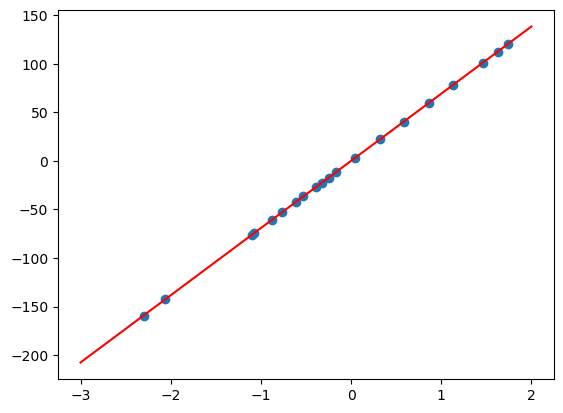

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0) #создание ndarray со значениями y0 для x0
plt.figure()
plt.scatter(x_series, y_series)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
print(b0, b1) #получившиеся параметры

-0.002136506860639315 69.18655192038247


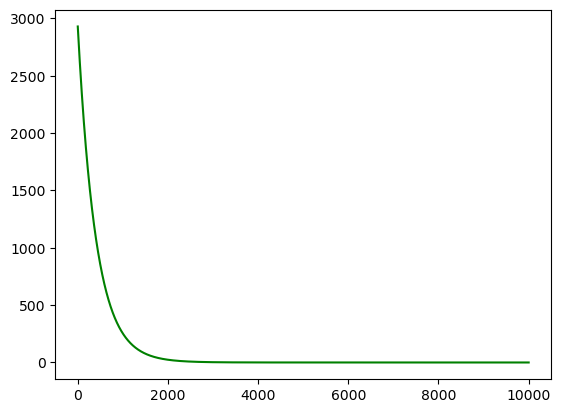

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g') #ргафик изменения ошибки относительно номера итерации (со временем)
plt.show()

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

Ошибка после градиентного спуска: 2.5297934237939247e-06
Ошибка после градиентного спуска: 2.964979237766241e-06
Ошибка после градиентного спуска: 3.7803392922996276e-06


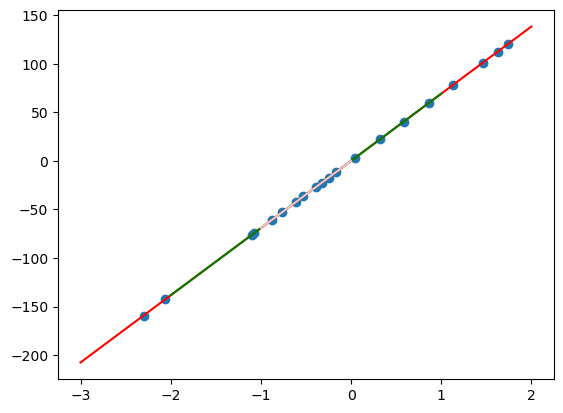

In [ ]:
hyp_1 = Model(1, 1)
steps_1, errors_1, b0_1, b1_1 = hyp_1.fit_series(x_series, y_series) #вычисление значений b0 и b1 в цикле
J = hyp_1.error_series(x_series, y_series) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)


hyp_2 = Model(-2, 2)
steps_2, errors_2, b0_2, b1_2 = hyp_2.fit_series(x_series, y_series) #вычисление значений b0 и b1 в цикле
J = hyp_2.error_series(x_series, y_series) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)

hyp_3 = Model(-10, 10)
steps_3, errors_3, b0_3, b1_3 = hyp_3.fit_series(x_series, y_series) #вычисление значений b0 и b1 в цикле
J = hyp_3.error_series(x_series, y_series) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)


X1 = np.linspace(-3, 2, 100)
X2 = np.linspace(-2, 1, 100)
X3 = np.linspace(-1, 0, 100)

Y1 = hyp_1.predict(X1)
Y2 = hyp_2.predict(X2)
Y3 = hyp_3.predict(X3)
plt.figure()
plt.scatter(x_series, y_series)
plt.plot(X1, Y1, 'r')
plt.plot(X2, Y2, 'g')
plt.plot(X3, Y3, 'pink')
plt.show()

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
hyp_1 = Model(1, 1)
steps_1, errors_1, b0_1, b1_1 = hyp_1.fit_series(x_series, y_series, 0.01) #вычисление значений b0 и b1 в цикле с aplpha = 0.01
J = hyp_1.error_series(x_series, y_series) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)

hyp_2 = Model(1, 1)
steps_2, errors_2, b0_2, b1_2 = hyp_2.fit_series(x_series, y_series, 0.1) #вычисление значений b0 и b1 в цикле с aplpha = 0.1
J = hyp_2.error_series(x_series, y_series) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)

hyp_3 = Model(1, 1)
steps_3, errors_3, b0_3, b1_3 = hyp_3.fit_series(x_series, y_series, 1) #вычисление значений b0 и b1 в цикле с aplpha = 1
J = hyp_3.error_series(x_series, y_series) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)

hyp_4 = Model(1, 1)
steps_4, errors_4, b0_4, b1_4 = hyp_4.fit_series(x_series, y_series, 0.0001) #вычисление значений b0 и b1 в цикле с aplpha = 0.0001
J = hyp_4.error_series(x_series, y_series) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)

hyp_5 = Model(1, 1)
steps_5, errors_5, b0_5, b1_5 = hyp_5.fit_series(x_series, y_series, 1.59) #вычисление значений b0 и b1 в цикле с aplpha = 1.59
J = hyp_5.error_series(x_series, y_series) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)

Ошибка после градиентного спуска: 2.0059226588479424e-25
Ошибка после градиентного спуска: 1.658624426653096e-27
Ошибка после градиентного спуска: 3.0967720910582346e-29
Ошибка после градиентного спуска: 245.07703891354495
Ошибка после градиентного спуска: inf


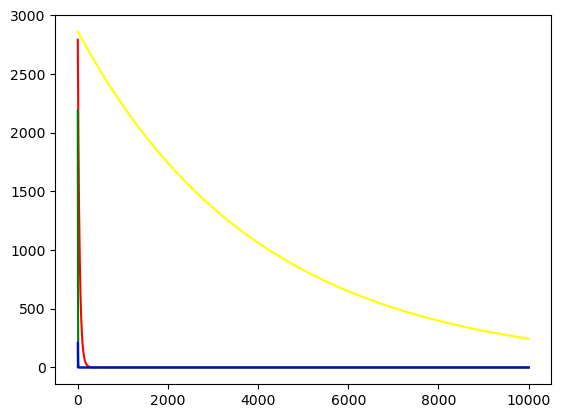

In [ ]:
plt.plot(steps_1, errors_1, 'r') #ргафик изменения ошибки относительно номера итерации (со временем)
plt.plot(steps_2, errors_2, 'g')
plt.plot(steps_3, errors_3, 'b')
plt.plot(steps_4, errors_4, 'yellow')
plt.show()

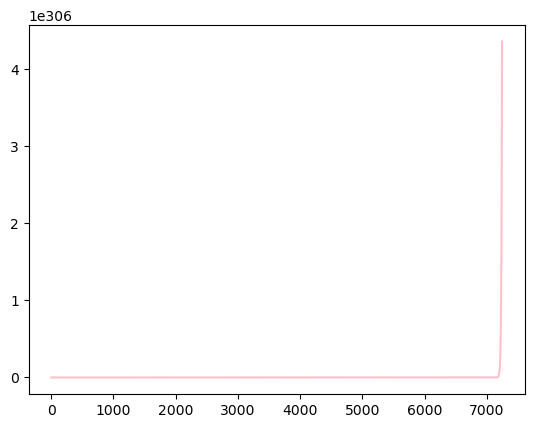

In [ ]:
plt.plot(steps_5, errors_5, 'pink'); #при alpha = 1.59 метод расходится (как только ошибка начинает расти - спуск расходится)

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [ ]:
#к исходному классу добавил методы для работы с DataFrame

In [ ]:
x_frame = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)
#загрузка данных, сохранение в виде объекта Series
y_frame = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)
display(x_frame)

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214
5,-0.611756
6,0.319039
7,-0.761207
8,0.582815
9,-1.099891


In [ ]:
hyp_6 = Model() #создание экземпляра класса
steps_6, errors_6, b0_6, b1_6 = hyp_6.fit_df(x_frame, y_frame) #вычисление значений b0 и b1 в цикле
J = hyp_6.error_df(x_frame, y_frame) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)

Ошибка после градиентного спуска: 2.7769753060572152e-06


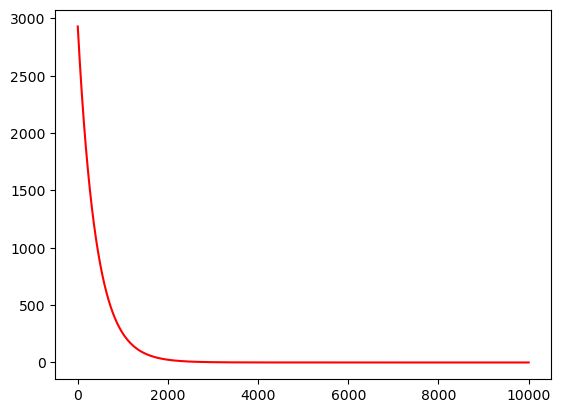

In [ ]:
plt.plot(steps_6, errors_6, 'r');

4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0): #определение параметров регрессии
        self.b0 = b0 #присваивание параметрам переданные значения
        self.b1 = b1

    def predict(self, X): #предсказание промежуточного результата по действующим параметрам
        return self.b0 + self.b1 * X

    def error_series(self, X, Y): #функция ошибки (среднеквадратическое отклонение) для Series
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def error_df(self, X, Y): #функция ошибки (среднеквадратическое отклонение) для Dataframe
        return sum((self.predict(X['0']) - Y['0'])**2) / (2 * len(X))

    def fit_series(self, X, Y, alpha=0.001): #для Series
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X) #градиентный спуск
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0  #изменение параметров регрессии, alpha - скорость обучения (изменения)
            self.b1 -= alpha * dJ1
            new_err = self.error_series(X, Y)
            if len(errors) > 0 and errors[-1] - new_err < 10**-3: #как только величина ошикби меньше 0.001, выхожу из цикла
                break
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors, self.b0, self.b1

    def fit_df(self, X, Y, alpha=0.001): #для Dataframe
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X['0']) - Y['0']) /len(X['0']) #градиентный спуск
            dJ1 = sum((self.predict(X['0']) - Y['0']) * X['0']) /len(X)
            self.b0 -= alpha * dJ0  #изменение параметров регрессии, alpha - скорость обучения (изменения)
            self.b1 -= alpha * dJ1
            new_err = self.error_df(X, Y)
            if len(errors) > 0 and errors[-1] - new_err < 10**-3: #как только величина ошикби меньше 0.001, выхожу из цикла
                break
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors, self.b0, self.b1

Ошибка после градиентного спуска: 0.47536984815996747


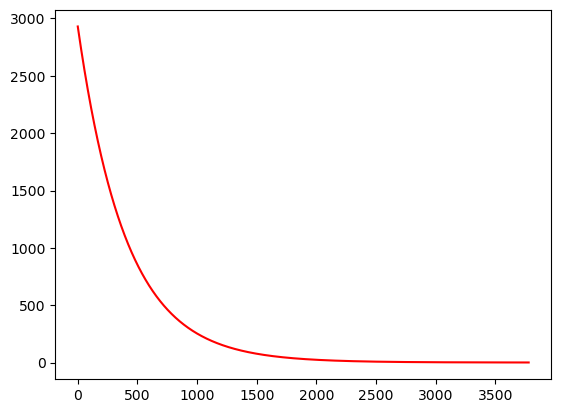

In [ ]:
#проверка работы алгоритма с DataFrame
hyp_6 = Model() #создание экземпляра класса
steps_6, errors_6, b0_6, b1_6 = hyp_6.fit_df(x_frame, y_frame) #вычисление значений b0 и b1 в цикле
J = hyp_6.error_df(x_frame, y_frame) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)
plt.plot(steps_6, errors_6, 'r');

Ошибка после градиентного спуска: 0.47536984815996747


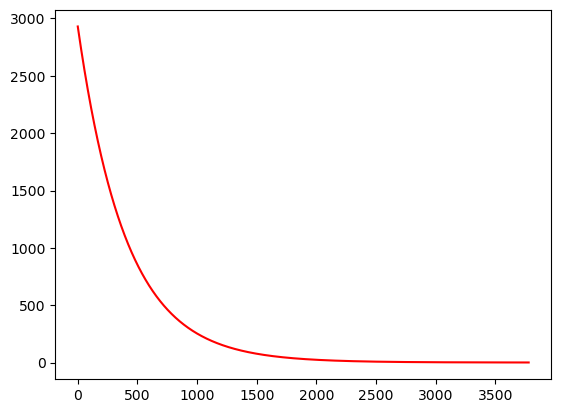

In [ ]:
#проверка работы алгоритма с Series
hyp_7 = Model() #создание экземпляра класса
steps_7, errors_7, b0_7, b1_7 = hyp_7.fit_series(x_series, y_series) #вычисление значений b0 и b1 в цикле
J = hyp_7.error_series(x_series, y_series) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)
plt.plot(steps_7, errors_7, 'r');

5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

Ошибка после градиентного спуска: 0.47536984815996747
Ошибка после градиентного спуска: 253.47092542308437


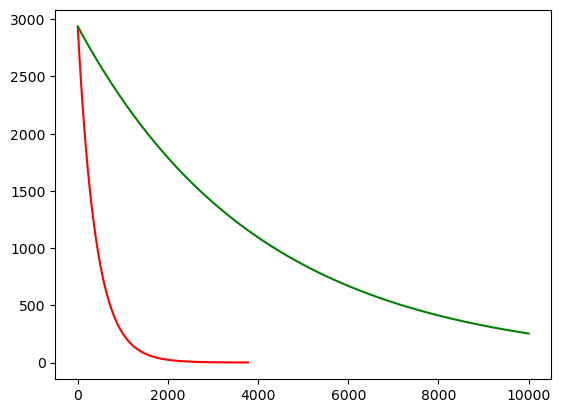

In [ ]:
hyp_8 = Model() #создание экземпляра класса
steps_8, errors_8, b0_8, b1_8 = hyp_8.fit_series(x_series, y_series) #вычисление значений b0 и b1 в цикле
J = hyp_8.error_series(x_series, y_series) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)

hyp_9 = Model() #создание экземпляра класса
steps_9, errors_9, b0_9, b1_9 = hyp_9.fit_series(x_series, y_series, 0.0001) #вычисление значений b0 и b1 в цикле c alpha=0.0001
J = hyp_9.error_series(x_series, y_series) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)
plt.plot(steps_8, errors_8, 'r')
plt.plot(steps_9, errors_9, 'g');

#hyp_8 завершается если ошибка перестает существенно меняться
#hyp_9 заверашется при достижении максимального количества шагов

6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0): #определение параметров регрессии
        self.b0 = b0
        self.b1 = b1

    def predict(self, X): #предсказание промежуточного результата по действующим параметрам
        return self.b0 + self.b1 * X

    def error_series(self, X, Y): #функция ошибки (среднеквадратическое отклонение) для Series
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def error_df(self, X, Y): #функция ошибки (среднеквадратическое отклонение) для Dataframe
        return sum((self.predict(X['0']) - Y['0'])**2) / (2 * len(X))

    def grad_series(self, X, Y, alpha): #если ошибка увеличилась, то сразу возвращаем alpha, если ни разу не поменялась, то это подходящая alpha
        errors = []
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            new_err = self.error_series(X, Y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            if len(errors) > 0 and new_err > errors[-1]:
                alpha /= 2
                break
            errors.append(new_err)
        self.b0 = 0
        self.b1 = 0
        return alpha

    def grad_df(self, X, Y, alpha): #если ошибка увеличилась, то сразу возвращаем alpha, если ни разу не поменялась, то это подходящая alpha
        errors = []
        for _ in range(10000):
            dJ0 = sum(self.predict(X['0']) - Y['0']) /len(X['0'])
            dJ1 = sum((self.predict(X['0']) - Y['0']) * X['0']) /len(X['0'])
            new_err = self.error_df(X, Y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            if len(errors) > 0 and new_err > errors[-1]:
                alpha /= 2
                break
            errors.append(new_err)
        self.b0 = 0
        self.b1 = 0
        return alpha

    def find_alpha_series(self, X, Y, alpha):
        for _ in range(10000):
            final_alpha = alpha
            alpha = self.grad_series(X,Y,alpha)
            if (final_alpha == alpha):
                break
        return alpha

    def find_alpha_df(self, X, Y, alpha):
        for _ in range(10000):
            final_alpha = alpha
            alpha = self.grad_df(X,Y,alpha)
            if (final_alpha == alpha):
                break
        return alpha

    def fit_series(self, X, Y, alpha=0.99): #для Series
        alpha = self.find_alpha_series(X, Y, alpha)
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X) #градиентный спуск
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            new_err = self.error_series(X, Y)
            self.b0 -= alpha * dJ0  #изменение параметров регрессии, alpha - скорость обучения (изменения)
            self.b1 -= alpha * dJ1
            if len(errors) > 0 and errors[-1] - new_err < 10**-6: #как только величина ошикби меньше, выхожу из цикла
                break
            step += 1
            steps.append(step)
            errors.append(new_err)
        self.draw(steps, errors)
        return steps, errors, self.b0, self.b1, alpha

    def fit_df(self, X, Y, alpha=0.99): #для Dataframe
        alpha = self.find_alpha_df(X, Y, alpha)
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X['0']) - Y['0']) /len(X['0']) #градиентный спуск
            dJ1 = sum((self.predict(X['0']) - Y['0']) * X['0']) /len(X)
            new_err = self.error_df(X, Y)
            self.b0 -= alpha * dJ0  #изменение параметров регрессии, alpha - скорость обучения (изменения)
            self.b1 -= alpha * dJ1
            if len(errors) > 0 and errors[-1] - new_err < 10**-6: #как только величина ошикби меньше, выхожу из цикла
                break
            step += 1
            steps.append(step)
            errors.append(new_err)
        self.draw(steps, errors)
        return steps, errors, self.b0, self.b1, alpha


    def draw(self, steps, errors):
        plt.plot(steps, errors, 'g');

Ошибка после градиентного спуска: 0.00027035410525424786
0.00193359375


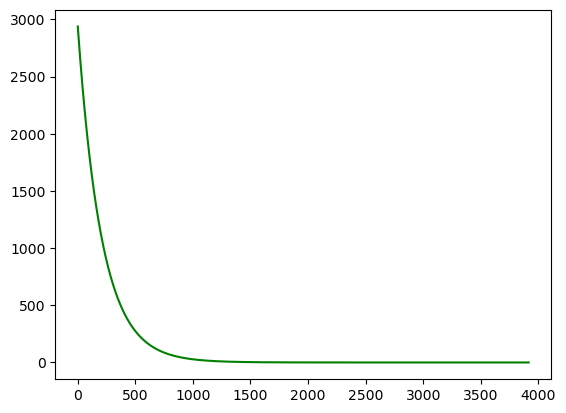

In [ ]:
hyp_10 = Model() #создание экземпляра класса
steps_10, errors_10, b0_10, b1_10, alpha = hyp_10.fit_series(x_series, y_series) #вычисление значений b0 и b1 в цикле
J = hyp_10.error_series(x_series, y_series) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)
print(alpha)



#Алгоритм работы:
#1) Сначала запускается функция fit_series, в которой должны в итоге определятся параметры b0 и b1
#2) В функции fit_series сначала запустится функция find_alpha_series, где определяется оптимальное значение скорости обучения
#3) В функции find_alpha_series будет вызываться функция grad_series, где будет проверяться, растет ли ошибка с числом
#итерации. Если растет, то мы сокращаем скорость в 2 раза, и возвращаем полученное значение в функцию find_alpha_series
#4) Т.к значение alpha поменялось, то мы продолжаем поиски оптимальной скорости обучения
#5) В какой-то момент будет достигнута ситуация, когда ошибка не будет расти - alpha не поменяется,
#значит это оптимальная скорость обучния.
#6) После функция fit_series исполнит до конца и найдет параметры b0 и b1

Ошибка после градиентного спуска: 0.00027035410525424786
0.00193359375


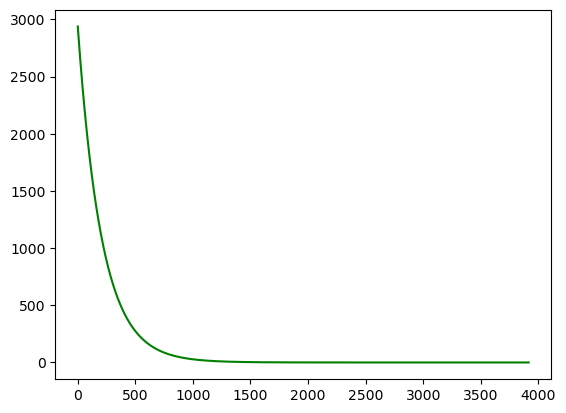

In [ ]:
#проверка работы алгоритма с DataFrame
hyp_11 = Model() #создание экземпляра класса
steps_11, errors_11, b0_11, b1_11, alpha= hyp_11.fit_df(x_frame, y_frame) #вычисление значений b0 и b1 в цикле
J = hyp_11.error_df(x_frame, y_frame) #вычисление финальной ошибки
print("Ошибка после градиентного спуска:", J)
print(alpha)

7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.


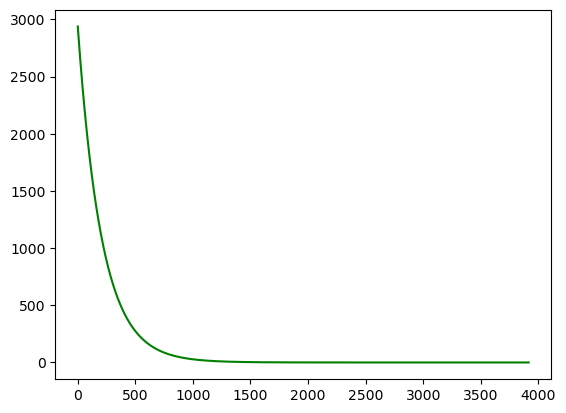

In [ ]:
hyp_10.draw(steps_10, errors_10)

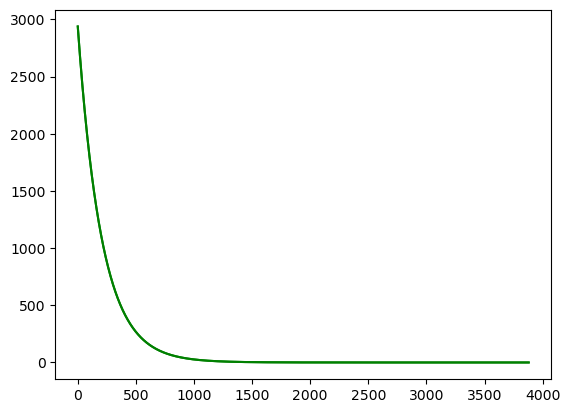

In [ ]:
hyp_12 = Model(-10, 10)
steps_12, errors_12, b0_12, b1_12, alpha = hyp_12.fit_series(x_series, y_series, 1) #вычисление значений b0 и b1 в цикле с alpha = 1
hyp_12.draw(steps_12, errors_12)